# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import numpy as np


In [6]:
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

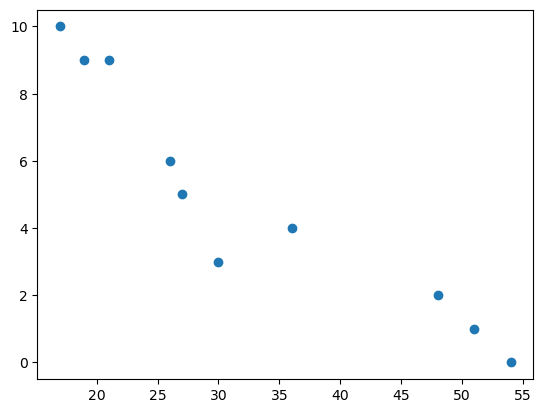

In [13]:
plt.scatter(x = student_data["age"], y=student_data["tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""
yes, the two variables are related.
the older the studente, latter he arrives in school.
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# 

student_data.corr()

#correlation: there is high correlation between the 2 variables on the opposite direction.
# they are inversaly proportional.




,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


In [15]:
student_data.cov()

#covariance: the numers are harder to relate as they have different unit, we are 
#comparing days with years.

# so correlation is better to chck the relation between the two variables.

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
model = linear_model.LinearRegression()

x= student_data[["age"]]
y = student_data["tardies"]


LinearRegression()

In [25]:
model.fit(x,y)

LinearRegression()

In [ ]:
# linear regression. because the variables seem to have a linear evolution


Plot your regression model on your scatter plot.

In [26]:
regression_line = model.intercept_ + model.coef_[0] * x


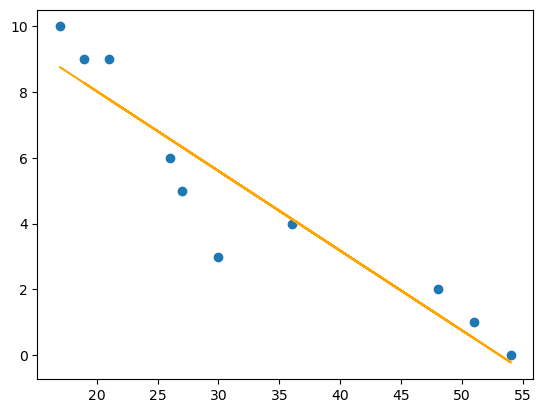

In [28]:
plt.plot(x, regression_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [31]:
model.score(x, y)


0.8820265558250109

In [ ]:
## im am pretty confident in this model. the model score is close to 1, which means 
# that the varibles are correlated. laties decrease as student's age gets higher
# yes, age is a predictor of lateness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [41]:
vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
vehicles_subset = vehicles.loc[:,["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]

vehicles_subset

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550
...,...,...,...,...,...,...
35947,244.000000,2013,3.0,9.155833,36,1100
35948,243.000000,2014,3.0,9.155833,36,1100
35949,244.000000,2015,3.0,9.155833,36,1100
35950,246.000000,2016,3.0,9.155833,36,1100


In [49]:
vehicles_subset.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [ ]:
"""
the variables that seem more positively related to CO2 emissions are Fuel Barrels/Year 
and Fuel Cost/years. Combined MPG is related but in a inverse proportion.
the Year is the least related variable.

"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [50]:
x = vehicles_subset[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles_subset["CO2 Emission Grams/Mile"]


ddddddddddd

0.9808734920269122

In [ ]:
# used a linear regression model
# has a hight score so it seems to be a good model.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

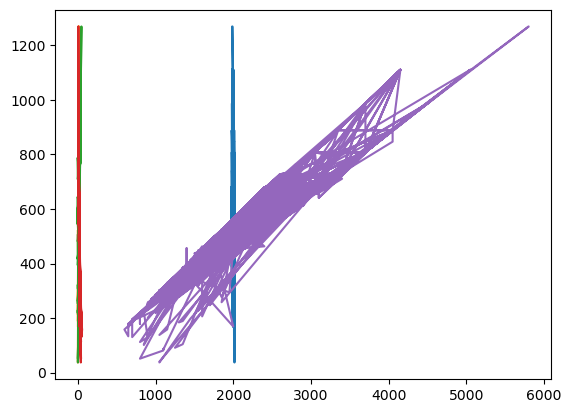

In [53]:
plt.plot(x, y)


# it seems some variables actually are realted, and others 

# not sure about what they mean as regression summary.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [5]:
party = pd.DataFrame({"invited": [1,3,4,6,8,9,11,14], "attended": [1,2,4,4,5,7,8,13]})

party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

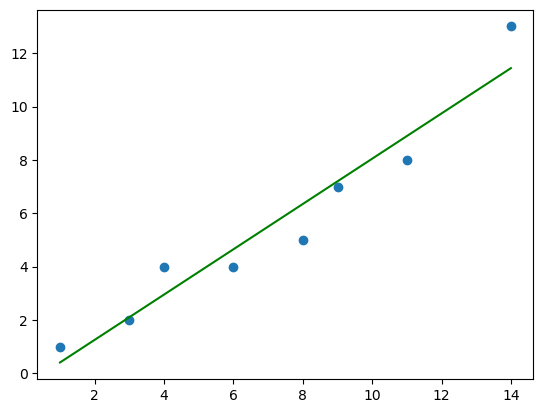

In [6]:
x = party[["invited"]]
y = party["attended"]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)


regression_line = model.intercept_ + model.coef_[0] * x

plt.scatter(party["invited"], party["attended"])
plt.plot(x, regression_line, c="green")



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [7]:
# yes, people invited anbd people attended are related on a positive way, the more pelople
# you invite, more people are going to attend

import statsmodels.api as sm

# Assuming you have already run a regression and stored the results in the "results" variable
print(regression_line.summary())


AttributeError: 'DataFrame' object has no attribute 'summary'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [9]:
x = party[["invited"]][:-1]
y = party["attended"][:-1]

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)




0.9433811802232854

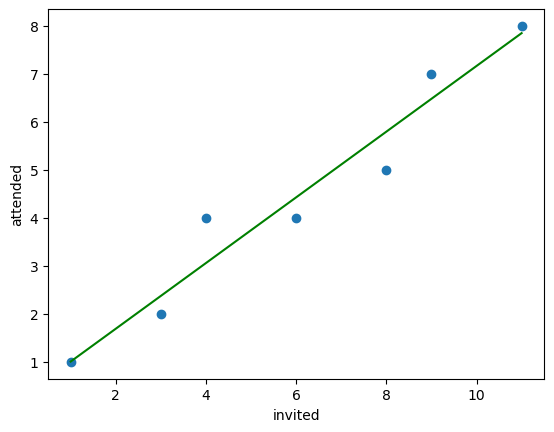

In [13]:

regression_line = model.intercept_ + model.coef_[0] * x

plt.scatter(x,y)
plt.plot(x, regression_line, c="green")
plt.xlabel("invited")
plt.ylabel("attended")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# the correlation increased because the outlier was removed.